In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
sns.set_theme()
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [31]:
data = pd.read_csv(r"C:\Users\Trilokesh\Downloads\Datas\MIP.csv")

In [32]:
data

Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1     12595800  
2      8981500  
3      9306700  
4     16906900  
...        ...  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400  

[1009 rows x 7 columns]

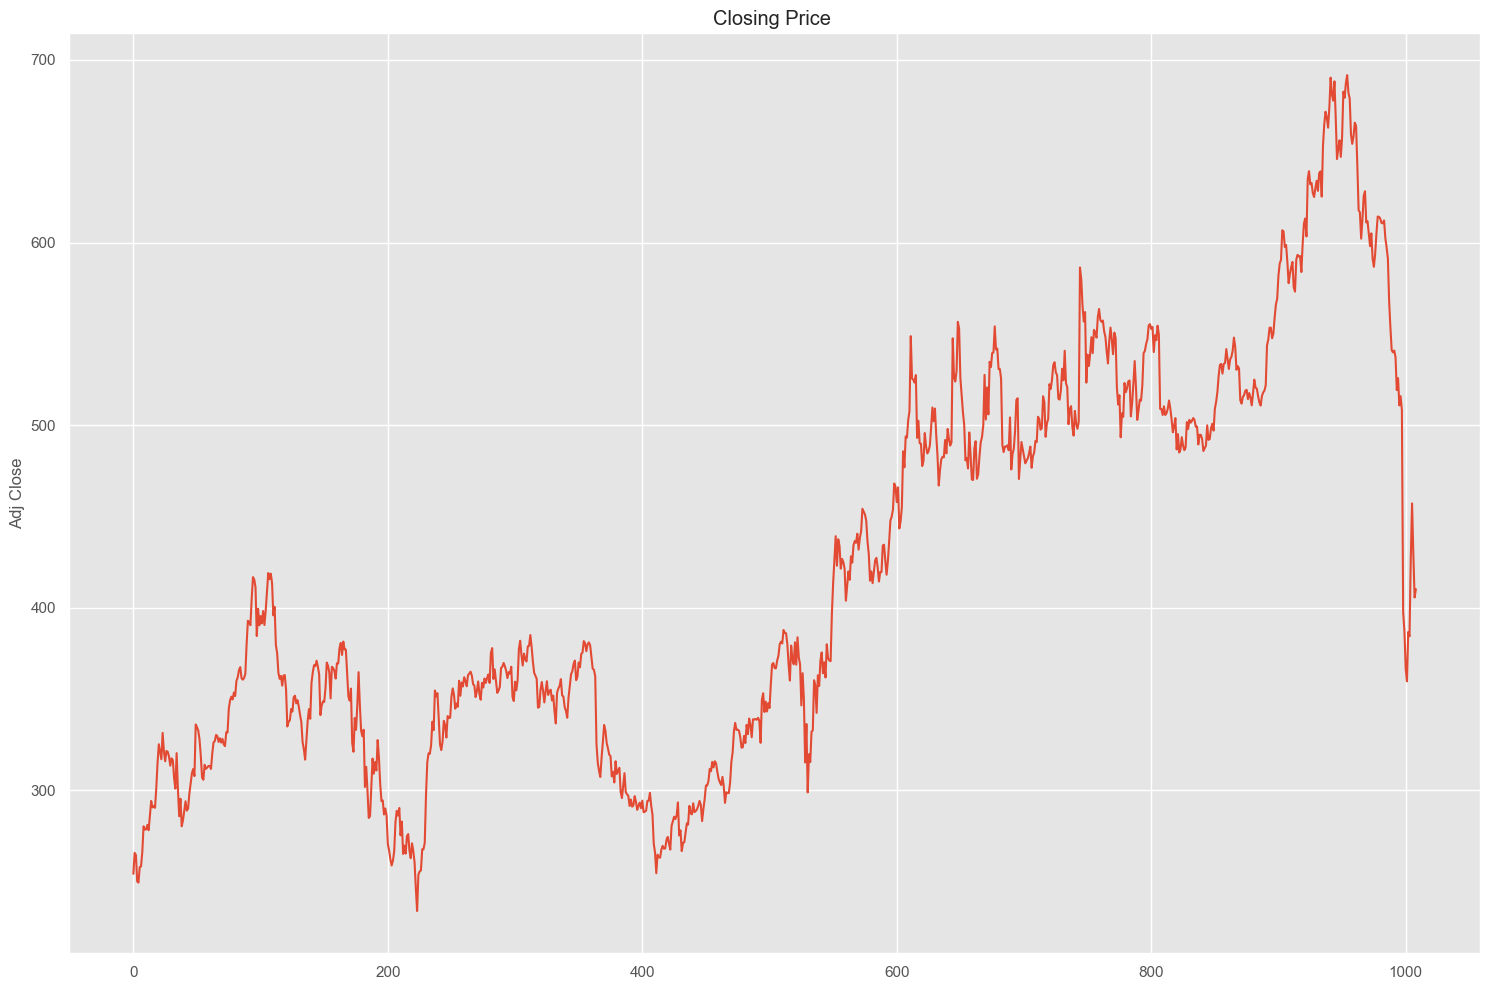

In [33]:
plt.figure(figsize=(15, 10))

data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price ")    
plt.tight_layout()

In [37]:
data['Date'] = pd.to_datetime(data.Date)

In [38]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0  11896100      419.748001      420.197913       417.405502      0.000831  
1  12595800      419.748001      420.197913       417.405502      0.045072  
2   8981500      419.748001      420.197913       417.405502     -0.004366  
3   9306700      419.748001      420.197913       417.405502     -0.054657  
4  16906900      419.748001      420.197913       417.405502     -0.002519

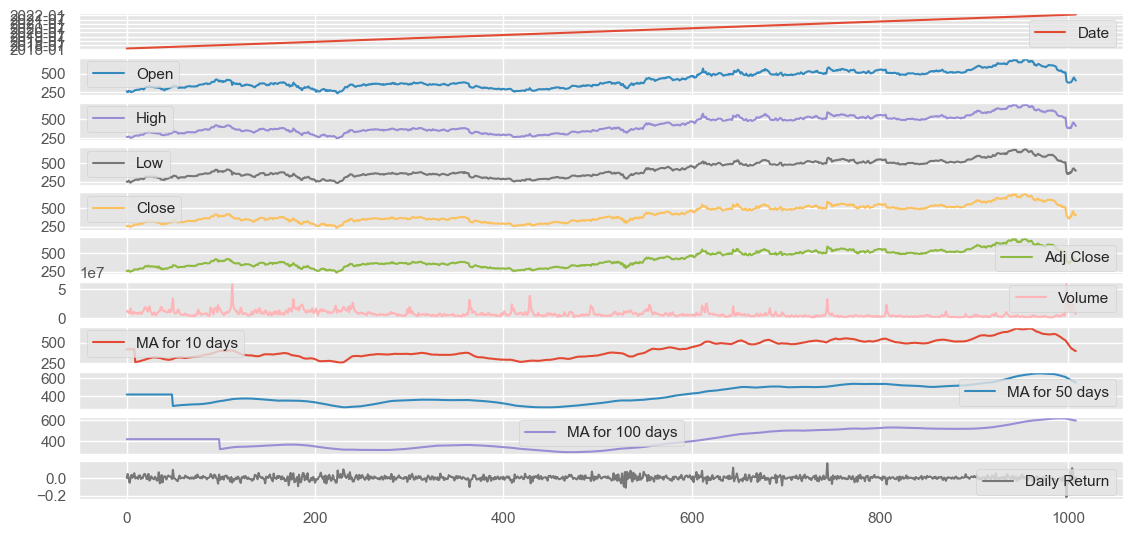

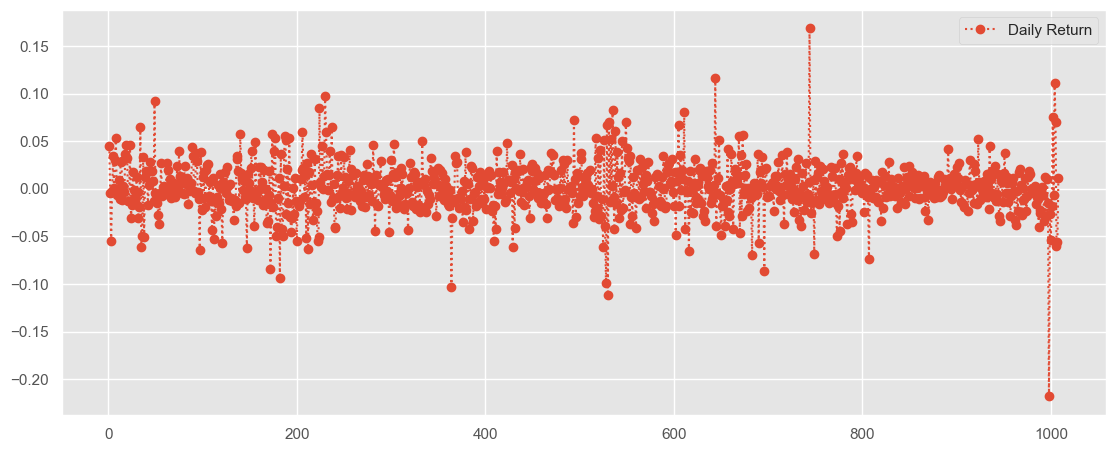

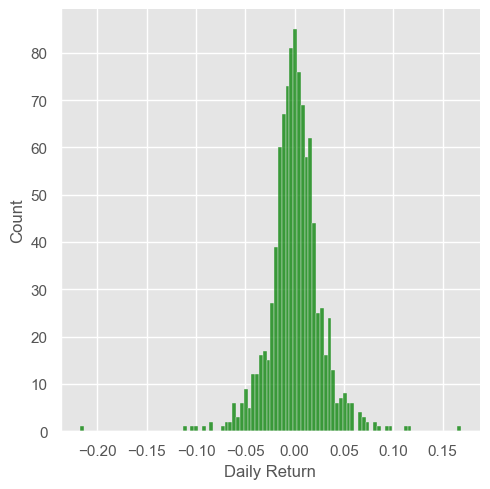

           Date        Open        High         Low       Close   Adj Close  \
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  MA for 10 days  MA for 50 days  MA 

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

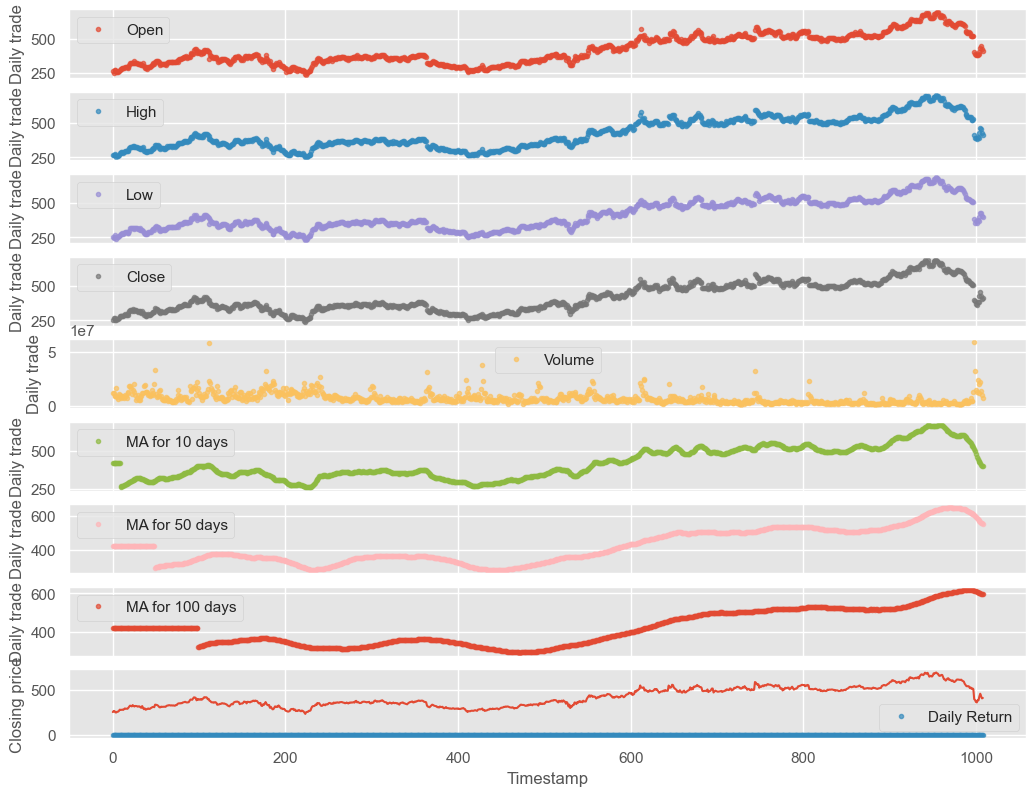

In [39]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

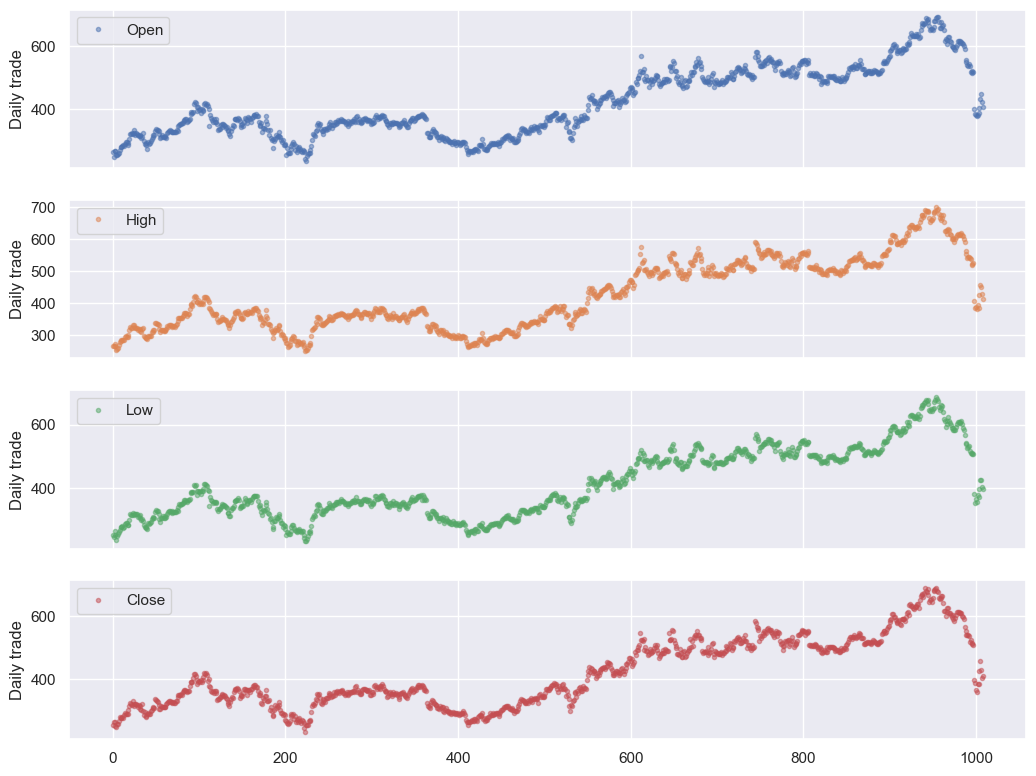

In [8]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  MA for 10 days  MA for 

count          mean           std           min  \
Open             1009.0  4.190597e+02  1.085375e+02  2.339200e+02   
High             1009.0  4.253207e+02  1.092630e+02  2.506500e+02   
Low              1009.0  4.123740e+02  1.075559e+02  2.312300e+02   
Close            1009.0  4.190007e+02  1.082900e+02  2.338800e+02   
Adj Close        1009.0  4.190007e+02  1.082900e+02  2.338800e+02   
Volume           1009.0  7.570685e+06  5.465535e+06  1.144000e+06   
MA for 10 days   1000.0  4.197480e+02  1.073588e+02  2.573520e+02   
MA for 50 days    960.0  4.201979e+02  1.040213e+02  2.809368e+02   
MA for 100 days   910.0  4.174055e+02  9.707598e+01  2.928746e+02   
Daily Return     1008.0  8.307950e-04  2.660327e-02 -2.179046e-01   

                          25%           50%           75%           max  
Open             3.314900e+02  3.777700e+02  5.091300e+02  6.923500e+02  
High             3.363000e+02  3.830100e+02  5.156300e+02  7.009900e+02  
Low              3.260000e+02  3.708800e+02  5.025300e+02  6.860900e+02  
Close            3.316200e+02  3.786700e+02  5.090800e+02  6.916900e+02  
Adj Close        3.316200e+02  3.786700e+02  5.090800e+02  6.916900e+02  
Volume           4.091900e+06  5.934500e+06  9.322400e+06  5.890430e+07  
MA for 10 days   3.340885e+02  3.755970e+02  5.135535e+02  6.747820e+02  
MA for 50 days   3.376167e+02  3.711056e+02  5.088541e+02  6.485930e+02  
MA for 100 days  3.333676e+02  3.648178e+02  5.157990e+02  6.167718e+02  
Daily Return    -1.193327e-02  6.729253e-04  1.454445e-02  1.685434e-01

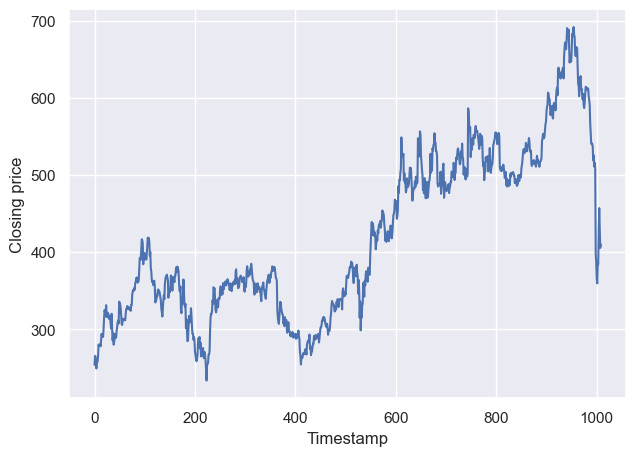

In [9]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

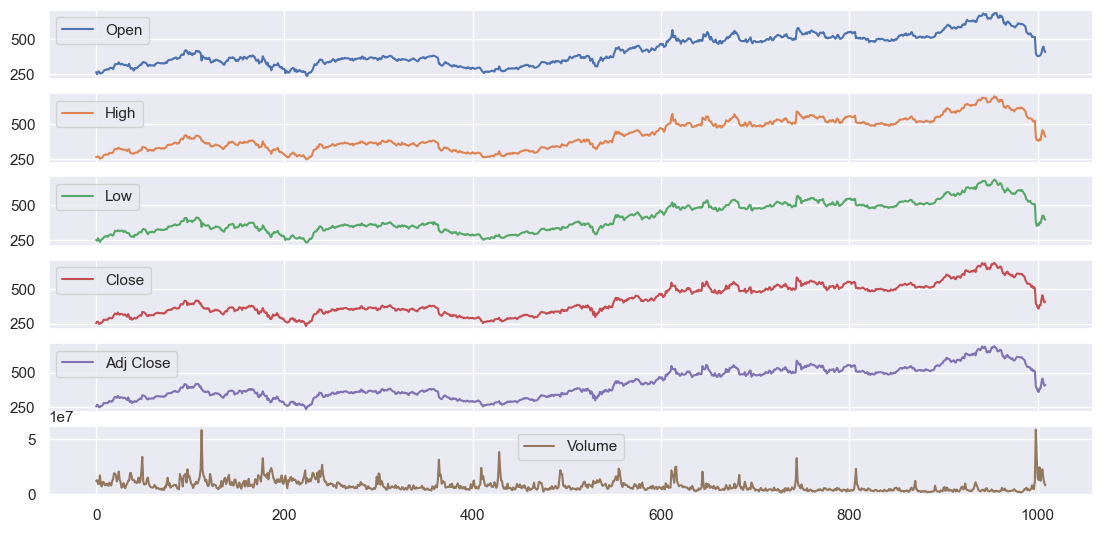

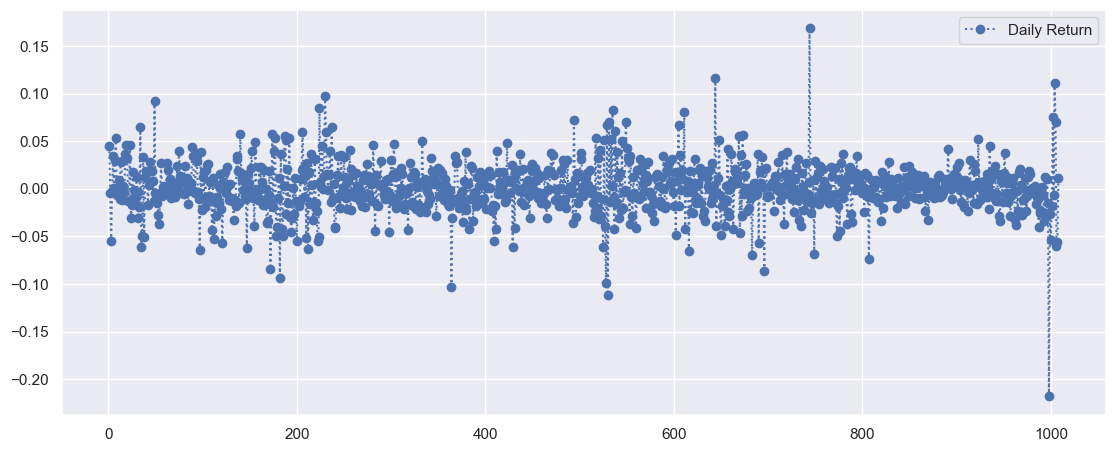

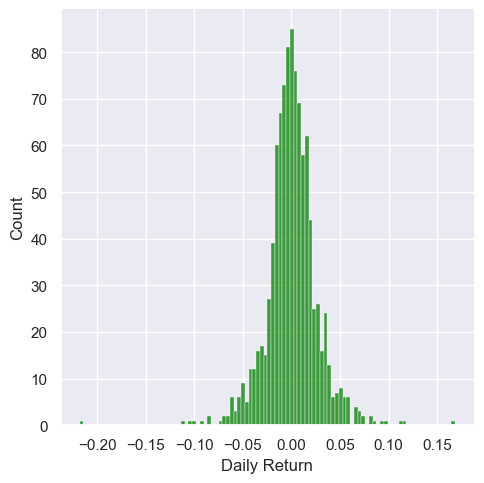

TypeError: Could not convert ['2018-02-052018-02-062018-02-072018-02-082018-02-092018-02-122018-02-132018-02-142018-02-152018-02-162018-02-202018-02-212018-02-222018-02-232018-02-262018-02-272018-02-282018-03-012018-03-022018-03-052018-03-062018-03-072018-03-082018-03-092018-03-122018-03-132018-03-142018-03-152018-03-162018-03-192018-03-202018-03-212018-03-222018-03-232018-03-262018-03-272018-03-282018-03-292018-04-022018-04-032018-04-042018-04-052018-04-062018-04-092018-04-102018-04-112018-04-122018-04-132018-04-162018-04-172018-04-182018-04-192018-04-202018-04-232018-04-242018-04-252018-04-262018-04-272018-04-302018-05-012018-05-022018-05-032018-05-042018-05-072018-05-082018-05-092018-05-102018-05-112018-05-142018-05-152018-05-162018-05-172018-05-182018-05-212018-05-222018-05-232018-05-242018-05-252018-05-292018-05-302018-05-312018-06-012018-06-042018-06-052018-06-062018-06-072018-06-082018-06-112018-06-122018-06-132018-06-142018-06-152018-06-182018-06-192018-06-202018-06-212018-06-222018-06-252018-06-262018-06-272018-06-282018-06-292018-07-022018-07-032018-07-052018-07-062018-07-092018-07-102018-07-112018-07-122018-07-132018-07-162018-07-172018-07-182018-07-192018-07-202018-07-232018-07-242018-07-252018-07-262018-07-272018-07-302018-07-312018-08-012018-08-022018-08-032018-08-062018-08-072018-08-082018-08-092018-08-102018-08-132018-08-142018-08-152018-08-162018-08-172018-08-202018-08-212018-08-222018-08-232018-08-242018-08-272018-08-282018-08-292018-08-302018-08-312018-09-042018-09-052018-09-062018-09-072018-09-102018-09-112018-09-122018-09-132018-09-142018-09-172018-09-182018-09-192018-09-202018-09-212018-09-242018-09-252018-09-262018-09-272018-09-282018-10-012018-10-022018-10-032018-10-042018-10-052018-10-082018-10-092018-10-102018-10-112018-10-122018-10-152018-10-162018-10-172018-10-182018-10-192018-10-222018-10-232018-10-242018-10-252018-10-262018-10-292018-10-302018-10-312018-11-012018-11-022018-11-052018-11-062018-11-072018-11-082018-11-092018-11-122018-11-132018-11-142018-11-152018-11-162018-11-192018-11-202018-11-212018-11-232018-11-262018-11-272018-11-282018-11-292018-11-302018-12-032018-12-042018-12-062018-12-072018-12-102018-12-112018-12-122018-12-132018-12-142018-12-172018-12-182018-12-192018-12-202018-12-212018-12-242018-12-262018-12-272018-12-282018-12-312019-01-022019-01-032019-01-042019-01-072019-01-082019-01-092019-01-102019-01-112019-01-142019-01-152019-01-162019-01-172019-01-182019-01-222019-01-232019-01-242019-01-252019-01-282019-01-292019-01-302019-01-312019-02-012019-02-042019-02-052019-02-062019-02-072019-02-082019-02-112019-02-122019-02-132019-02-142019-02-152019-02-192019-02-202019-02-212019-02-222019-02-252019-02-262019-02-272019-02-282019-03-012019-03-042019-03-052019-03-062019-03-072019-03-082019-03-112019-03-122019-03-132019-03-142019-03-152019-03-182019-03-192019-03-202019-03-212019-03-222019-03-252019-03-262019-03-272019-03-282019-03-292019-04-012019-04-022019-04-032019-04-042019-04-052019-04-082019-04-092019-04-102019-04-112019-04-122019-04-152019-04-162019-04-172019-04-182019-04-222019-04-232019-04-242019-04-252019-04-262019-04-292019-04-302019-05-012019-05-022019-05-032019-05-062019-05-072019-05-082019-05-092019-05-102019-05-132019-05-142019-05-152019-05-162019-05-172019-05-202019-05-212019-05-222019-05-232019-05-242019-05-282019-05-292019-05-302019-05-312019-06-032019-06-042019-06-052019-06-062019-06-072019-06-102019-06-112019-06-122019-06-132019-06-142019-06-172019-06-182019-06-192019-06-202019-06-212019-06-242019-06-252019-06-262019-06-272019-06-282019-07-012019-07-022019-07-032019-07-052019-07-082019-07-092019-07-102019-07-112019-07-122019-07-152019-07-162019-07-172019-07-182019-07-192019-07-222019-07-232019-07-242019-07-252019-07-262019-07-292019-07-302019-07-312019-08-012019-08-022019-08-052019-08-062019-08-072019-08-082019-08-092019-08-122019-08-132019-08-142019-08-152019-08-162019-08-192019-08-202019-08-212019-08-222019-08-232019-08-262019-08-272019-08-282019-08-292019-08-302019-09-032019-09-042019-09-052019-09-062019-09-092019-09-102019-09-112019-09-122019-09-132019-09-162019-09-172019-09-182019-09-192019-09-202019-09-232019-09-242019-09-252019-09-262019-09-272019-09-302019-10-012019-10-022019-10-032019-10-042019-10-072019-10-082019-10-092019-10-102019-10-112019-10-142019-10-152019-10-162019-10-172019-10-182019-10-212019-10-222019-10-232019-10-242019-10-252019-10-282019-10-292019-10-302019-10-312019-11-012019-11-042019-11-052019-11-062019-11-072019-11-082019-11-112019-11-122019-11-132019-11-142019-11-152019-11-182019-11-192019-11-202019-11-212019-11-222019-11-252019-11-262019-11-272019-11-292019-12-022019-12-032019-12-042019-12-052019-12-062019-12-092019-12-102019-12-112019-12-122019-12-132019-12-162019-12-172019-12-182019-12-192019-12-202019-12-232019-12-242019-12-262019-12-272019-12-302019-12-312020-01-022020-01-032020-01-062020-01-072020-01-082020-01-092020-01-102020-01-132020-01-142020-01-152020-01-162020-01-172020-01-212020-01-222020-01-232020-01-242020-01-272020-01-282020-01-292020-01-302020-01-312020-02-032020-02-042020-02-052020-02-062020-02-072020-02-102020-02-112020-02-122020-02-132020-02-142020-02-182020-02-192020-02-202020-02-212020-02-242020-02-252020-02-262020-02-272020-02-282020-03-022020-03-032020-03-042020-03-052020-03-062020-03-092020-03-102020-03-112020-03-122020-03-132020-03-162020-03-172020-03-182020-03-192020-03-202020-03-232020-03-242020-03-252020-03-262020-03-272020-03-302020-03-312020-04-012020-04-022020-04-032020-04-062020-04-072020-04-082020-04-092020-04-132020-04-142020-04-152020-04-162020-04-172020-04-202020-04-212020-04-222020-04-232020-04-242020-04-272020-04-282020-04-292020-04-302020-05-012020-05-042020-05-052020-05-062020-05-072020-05-082020-05-112020-05-122020-05-132020-05-142020-05-152020-05-182020-05-192020-05-202020-05-212020-05-222020-05-262020-05-272020-05-282020-05-292020-06-012020-06-022020-06-032020-06-042020-06-052020-06-082020-06-092020-06-102020-06-112020-06-122020-06-152020-06-162020-06-172020-06-182020-06-192020-06-222020-06-232020-06-242020-06-252020-06-262020-06-292020-06-302020-07-012020-07-022020-07-062020-07-072020-07-082020-07-092020-07-102020-07-132020-07-142020-07-152020-07-162020-07-172020-07-202020-07-212020-07-222020-07-232020-07-242020-07-272020-07-282020-07-292020-07-302020-07-312020-08-032020-08-042020-08-052020-08-062020-08-072020-08-102020-08-112020-08-122020-08-132020-08-142020-08-172020-08-182020-08-192020-08-202020-08-212020-08-242020-08-252020-08-262020-08-272020-08-282020-08-312020-09-012020-09-022020-09-032020-09-042020-09-082020-09-092020-09-102020-09-112020-09-142020-09-152020-09-162020-09-172020-09-182020-09-212020-09-222020-09-232020-09-242020-09-252020-09-282020-09-292020-09-302020-10-012020-10-022020-10-052020-10-062020-10-072020-10-082020-10-092020-10-122020-10-132020-10-142020-10-152020-10-162020-10-192020-10-202020-10-212020-10-222020-10-232020-10-262020-10-272020-10-282020-10-292020-10-302020-11-022020-11-032020-11-042020-11-052020-11-062020-11-092020-11-102020-11-112020-11-122020-11-132020-11-162020-11-172020-11-182020-11-192020-11-202020-11-232020-11-242020-11-252020-11-272020-11-302020-12-012020-12-022020-12-032020-12-042020-12-072020-12-082020-12-092020-12-102020-12-112020-12-142020-12-152020-12-162020-12-172020-12-182020-12-212020-12-222020-12-232020-12-242020-12-282020-12-292020-12-302020-12-312021-01-042021-01-052021-01-062021-01-072021-01-082021-01-112021-01-122021-01-132021-01-142021-01-152021-01-192021-01-202021-01-212021-01-222021-01-252021-01-262021-01-272021-01-282021-01-292021-02-012021-02-022021-02-032021-02-042021-02-052021-02-082021-02-092021-02-102021-02-112021-02-122021-02-162021-02-172021-02-182021-02-192021-02-222021-02-232021-02-242021-02-252021-02-262021-03-012021-03-022021-03-032021-03-042021-03-052021-03-082021-03-092021-03-102021-03-112021-03-122021-03-152021-03-162021-03-172021-03-182021-03-192021-03-222021-03-232021-03-242021-03-252021-03-262021-03-292021-03-302021-03-312021-04-012021-04-052021-04-062021-04-072021-04-082021-04-092021-04-122021-04-132021-04-142021-04-152021-04-162021-04-192021-04-202021-04-212021-04-222021-04-232021-04-262021-04-272021-04-282021-04-292021-04-302021-05-032021-05-042021-05-052021-05-062021-05-072021-05-102021-05-112021-05-122021-05-132021-05-142021-05-172021-05-182021-05-192021-05-202021-05-212021-05-242021-05-252021-05-262021-05-272021-05-282021-06-012021-06-022021-06-032021-06-042021-06-072021-06-082021-06-092021-06-102021-06-112021-06-142021-06-152021-06-162021-06-172021-06-182021-06-212021-06-222021-06-232021-06-242021-06-252021-06-282021-06-292021-06-302021-07-012021-07-022021-07-062021-07-072021-07-082021-07-092021-07-122021-07-132021-07-142021-07-152021-07-162021-07-192021-07-202021-07-212021-07-222021-07-232021-07-262021-07-272021-07-282021-07-292021-07-302021-08-022021-08-032021-08-042021-08-052021-08-062021-08-092021-08-102021-08-112021-08-122021-08-132021-08-162021-08-172021-08-182021-08-192021-08-202021-08-232021-08-242021-08-252021-08-262021-08-272021-08-302021-08-312021-09-012021-09-022021-09-032021-09-072021-09-082021-09-092021-09-102021-09-132021-09-142021-09-152021-09-162021-09-172021-09-202021-09-212021-09-222021-09-232021-09-242021-09-272021-09-282021-09-292021-09-302021-10-012021-10-042021-10-052021-10-062021-10-072021-10-082021-10-112021-10-122021-10-132021-10-142021-10-152021-10-182021-10-192021-10-202021-10-212021-10-222021-10-252021-10-262021-10-272021-10-282021-10-292021-11-012021-11-022021-11-032021-11-042021-11-052021-11-082021-11-092021-11-102021-11-112021-11-122021-11-152021-11-162021-11-172021-11-182021-11-192021-11-222021-11-232021-11-242021-11-262021-11-292021-11-302021-12-012021-12-022021-12-032021-12-062021-12-072021-12-082021-12-092021-12-102021-12-132021-12-142021-12-152021-12-162021-12-172021-12-202021-12-212021-12-222021-12-232021-12-272021-12-282021-12-292021-12-302021-12-312022-01-032022-01-042022-01-052022-01-062022-01-072022-01-102022-01-112022-01-122022-01-132022-01-142022-01-182022-01-192022-01-202022-01-212022-01-242022-01-252022-01-262022-01-272022-01-282022-01-312022-02-012022-02-022022-02-032022-02-04'] to numeric

In [29]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

In [10]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

725
182


In [12]:
 # For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
19/19 [==============================] - 8s 90ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1243 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.1026
Epoch 2/40
19/19 [==============================] - 0s 17ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0895 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0828
Epoch 3/40
19/19 [==============================] - 0s 19ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0792 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0766
Epoch 4/40
19/19 [==============================] - 0s 22ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0794 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0656
Epoch 5/40
19/19 [==============================] - 0s 22ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0732 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0731
Epoch 6/40
19/19 [==============================] - 0s 21ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0686 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0659
Epoch 7/40
19/19 [====

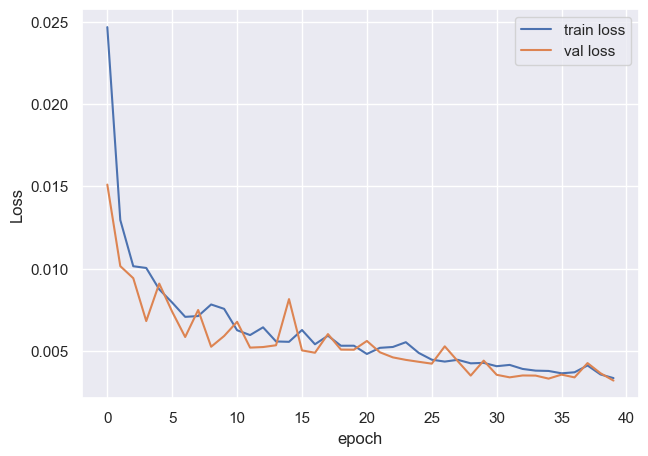

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [14]:
from tensorflow.keras.utils import plot_model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDi  (None, 1, 98, 64)         256       
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, 1, 23, 128)        0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, 1, 21, 64)        

In [15]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0420


[0.0031841096933931112, 0.0031841096933931112, 0.041967347264289856]

In [16]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.924432
R2 Score: 0.924432
Max Error: 0.202518


6/6 [==============================] - 0s 2ms/step


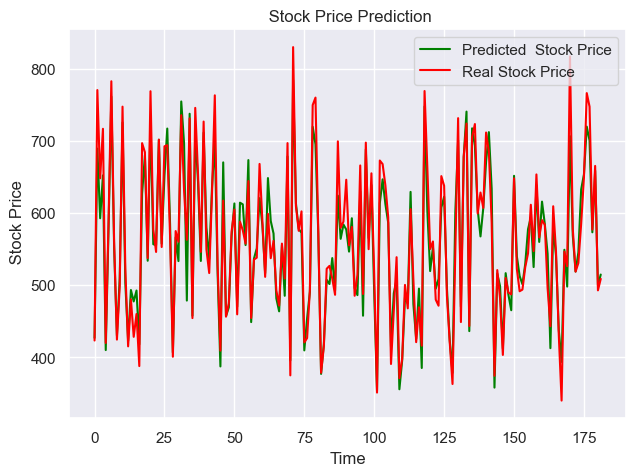

In [17]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [20]:
model.save("model.h5")

In [21]:
new_model = tf.keras.models.load_model("./model.h5")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDi  (None, 1, 98, 64)         256       
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, 1, 23, 128)        0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, 1, 21, 64)        

In [44]:
data['Date'] = pd.to_datetime(data.Date)

In [18]:
sns_plot = sns.distplot(data['Close'])
sns_plot2 = sns.distplot(data['Close'])

In [17]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= data["Close"], ax = ax[0,0])
sns.distplot(data['Close'], ax = ax[0,1])
sns.boxplot(x= data["Open"], ax = ax[1,0])
sns.distplot(data['Open'], ax = ax[1,1])
sns.boxplot(x= data["High"], ax = ax[2,0])
sns.distplot(data['High'], ax = ax[2,1])
sns.boxplot(x= data["Low"], ax = ax[3,0])
sns.distplot(data['Low'], ax = ax[3,1])
plt.tight_layout()